In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


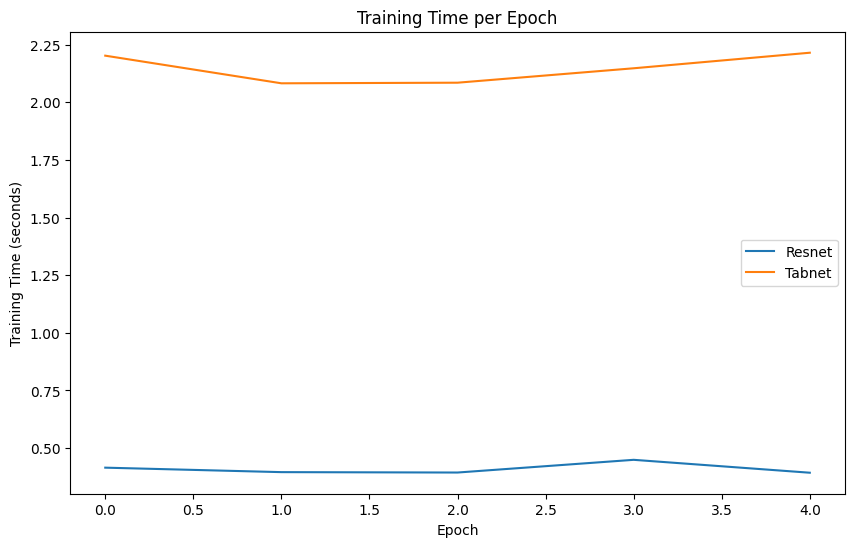

In [2]:
# Load the results of the resnet and tabnet
resnet_results = json.load(open("./results/resnet_metrics_dataset_preprocessed_smote.json"))
tabnet_results = json.load(open("./results/tabnet_metrics_dataset_preprocessed_smote.json"))

epochs = 5

# Plot the training time
plt.figure(figsize=(10, 6))
plt.plot(resnet_results["epoch_times"][:epochs], label="Resnet")
plt.plot(tabnet_results["epoch_times"][:epochs], label="Tabnet")
plt.xlabel("Epoch")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time per Epoch")
plt.legend()
plt.show()

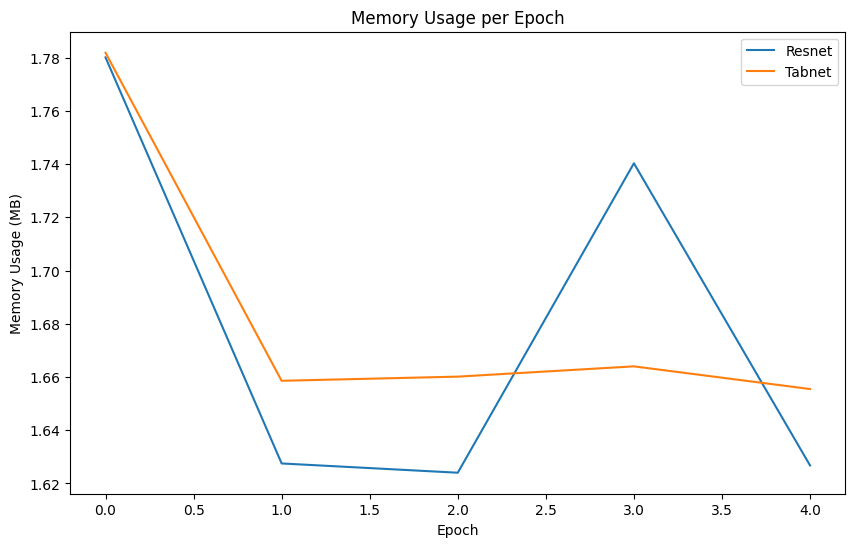

In [3]:
resnet_memory_usages = resnet_results["memory_usages"][:epochs]
tabnet_memory_usages = tabnet_results["memory_usages"][:epochs]

resnet_mu = [mu["peak_MB"] for mu in resnet_memory_usages]
tabnet_mu = [mu["peak_MB"] for mu in tabnet_memory_usages]

plt.figure(figsize=(10, 6))
plt.plot(resnet_mu, label="Resnet")
plt.plot(tabnet_mu, label="Tabnet")
plt.xlabel("Epoch")
plt.ylabel("Memory Usage (MB)")
plt.title("Memory Usage per Epoch")
plt.legend()
plt.show()


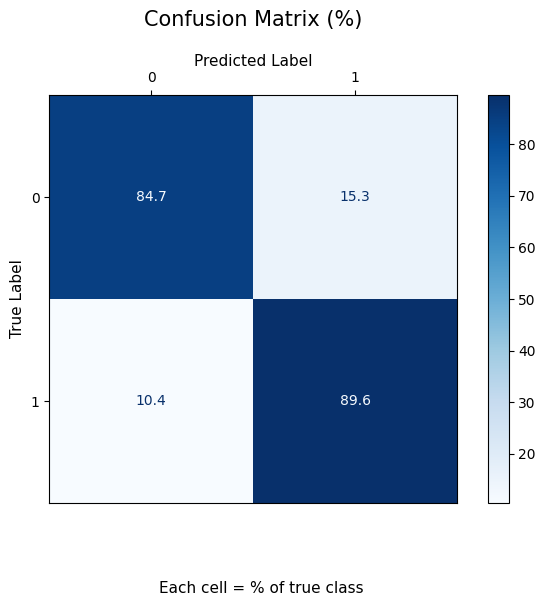

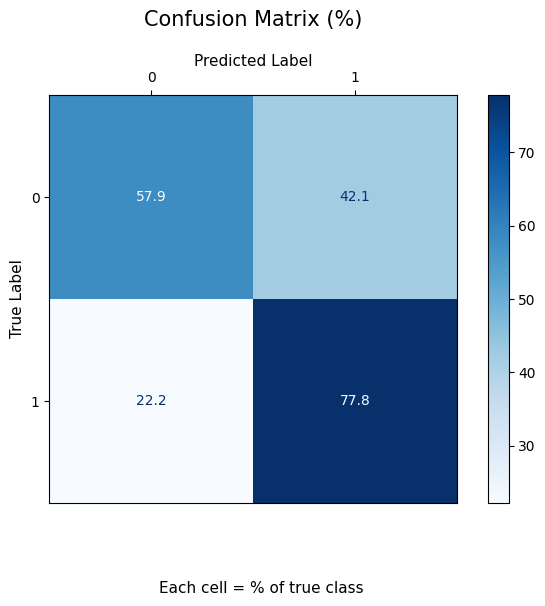

In [6]:
# Confusion matrix

# Load the results of the resnet and tabnet
resnet_results = json.load(open("./results/resnet_metrics_dataset_preprocessed_smote.json"))
tabnet_results = json.load(open("./results/tabnet_metrics_dataset_preprocessed_smote.json"))

def plot_confusion_matrix(cm, classes):
    cm_percent = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

    fig, ax = plt.subplots(figsize=(8, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm_percent, display_labels=classes)
    disp.plot(cmap=plt.cm.Blues, values_format=".1f", ax=ax)

    plt.title('Confusion Matrix (%)', fontsize=15, pad=20)
    plt.xlabel('Predicted Label', fontsize=11)
    plt.ylabel('True Label', fontsize=11)

    # Customizations
    ax.xaxis.set_label_position('top')
    ax.xaxis.tick_top()
    fig.subplots_adjust(bottom=0.2)
    fig.text(0.5, 0.05, 'Each cell = % of true class', ha='center', fontsize=11)
    plt.show()

plot_confusion_matrix(np.array(resnet_results["confusion_matrix"]), [0,1])
plot_confusion_matrix(np.array(tabnet_results["confusion_matrix"]), [0,1])